<a href="https://colab.research.google.com/github/uthanda-vinayagam/HOUSE-PRICE-ESTIMATION/blob/main/HOUSE_PRICE_ESTIMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


In [ ]:
import pandas as pd


df = pd.read_csv('boston.csv')


df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:

df.info()


df.describe()


df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('MEDV', axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error: {mse:.2f}")
print(f" R^2 Score: {r2:.2f}")


 Mean Squared Error: 24.29
 R^2 Score: 0.67


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)


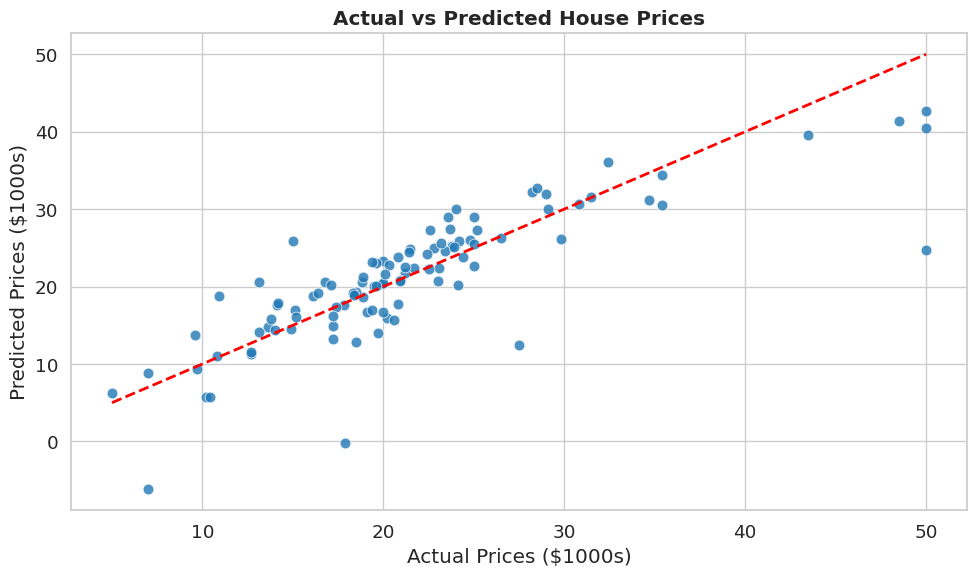

In [ ]:
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure()
    sns.scatterplot(x=y_test, y=y_pred, color="#1f77b4", s=60, edgecolor="w", alpha=0.8)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
    plt.xlabel("Actual Prices ($1000s)")
    plt.ylabel("Predicted Prices ($1000s)")
    plt.title("Actual vs Predicted House Prices", weight='bold')
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)


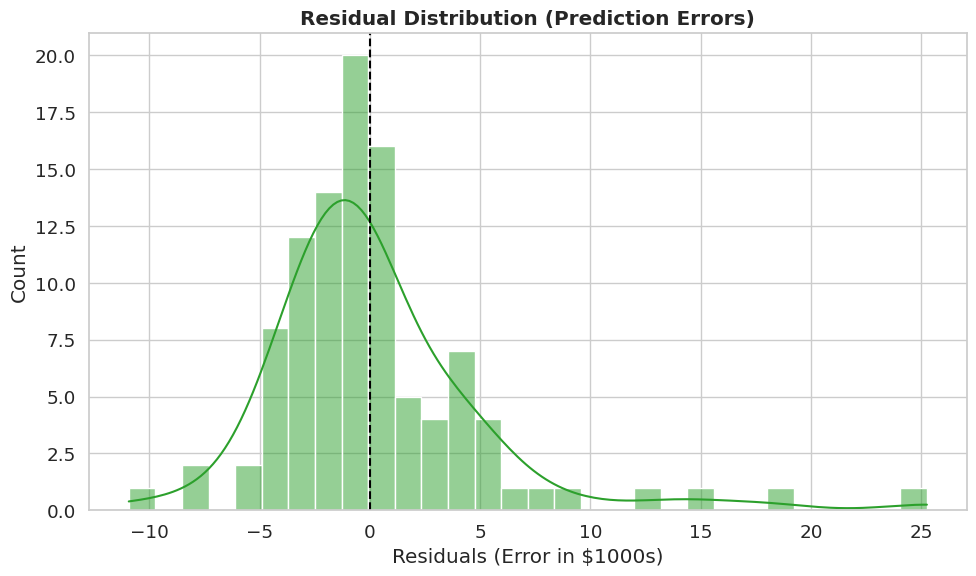

In [ ]:
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True, color="#2ca02c", edgecolor="white")
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel("Residuals (Error in $1000s)")
    plt.title("Residual Distribution (Prediction Errors)", weight='bold')
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_pred)


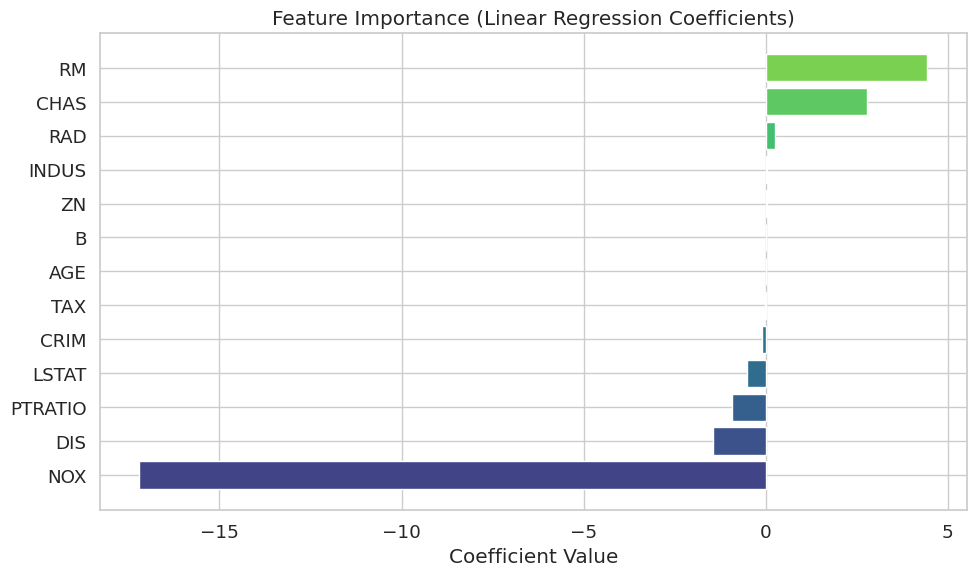

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


def plot_feature_importance(model, features):
    importance = model.coef_
    indices = np.argsort(importance)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(len(indices)), importance[indices], align='center', color=plt.cm.viridis(np.linspace(0.2, 0.8, len(indices))))
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title("Feature Importance (Linear Regression Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_feature_importance(lr_model, X.columns)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(" Model Evaluation Metrics:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R² Score: {r2:.2f}")


 Model Evaluation Metrics:
 Mean Absolute Error (MAE): 3.19
 Mean Squared Error (MSE): 24.29
 Root Mean Squared Error (RMSE): 4.93
 R² Score: 0.67


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)


rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)


print(" Random Forest Model Evaluation:")
print(f" MAE: {rf_mae:.2f}")
print(f" MSE: {rf_mse:.2f}")
print(f" RMSE: {rf_rmse:.2f}")
print(f" R² Score: {rf_r2:.2f}")


 Random Forest Model Evaluation:
 MAE: 2.04
 MSE: 7.90
 RMSE: 2.81
 R² Score: 0.89


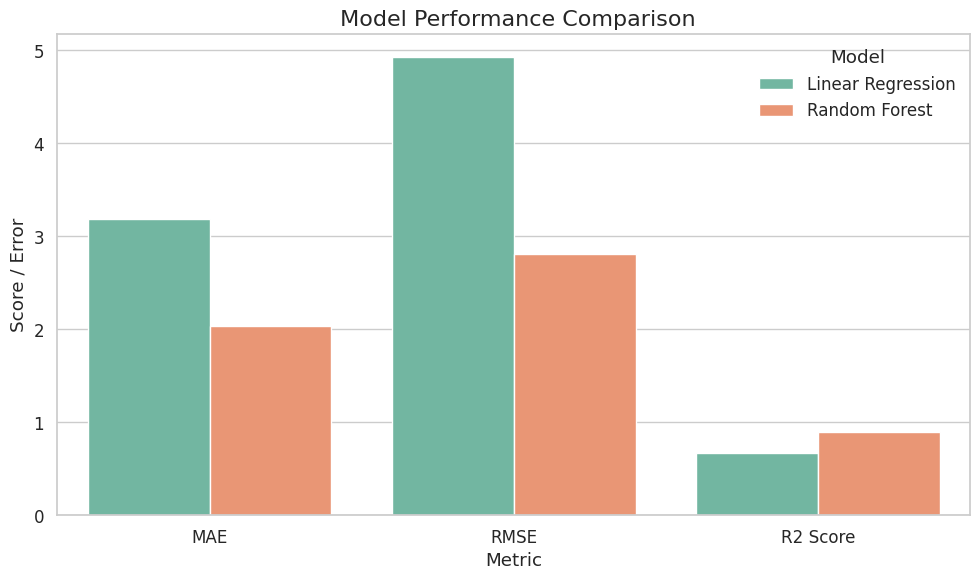

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


lr_mae = mean_absolute_error(y_test, lr_model.predict(X_test))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_model.predict(X_test)))
lr_r2 = r2_score(y_test, lr_model.predict(X_test))




model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R2 Score': [lr_r2, rf_r2]
})


melted_df = model_comparison.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.1)
sns.barplot(data=melted_df, x='Metric', y='Value', hue='Model', palette='Set2')

plt.title(" Model Performance Comparison", fontsize=16)
plt.ylabel("Score / Error")
plt.tight_layout()
plt.show()


/tmp/ipython-input-44-4031123659.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


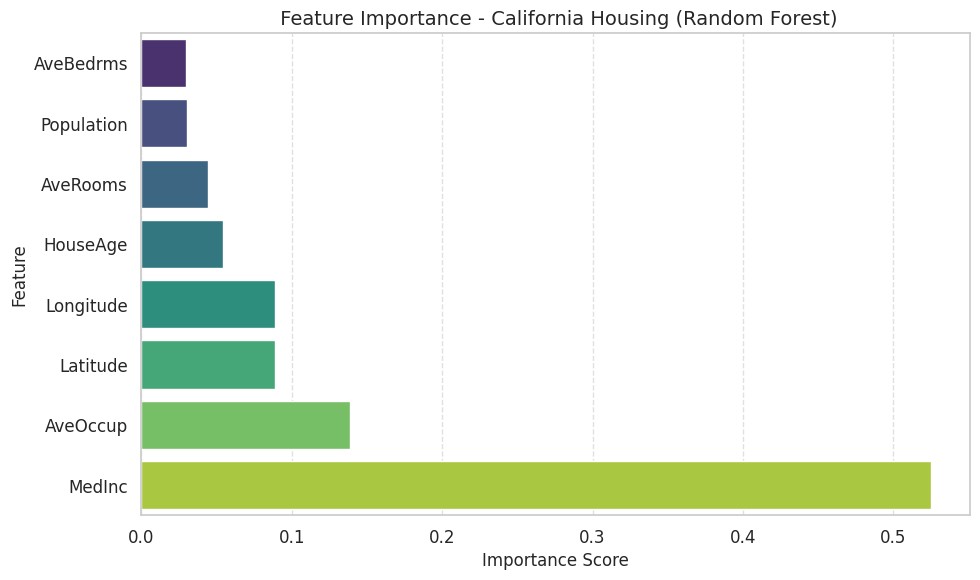

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values()


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(
    x=feature_imp.values,
    y=feature_imp.index,
    palette=sns.color_palette("viridis", len(feature_imp)),
    legend=False
)
plt.title(" Feature Importance - California Housing (Random Forest)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_pred = rf_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("Model Evaluation:")
print(f"MAE (Mean Absolute Error): {mae:.3f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
MAE (Mean Absolute Error): 0.328
RMSE (Root Mean Squared Error): 0.505
R² Score: 0.805


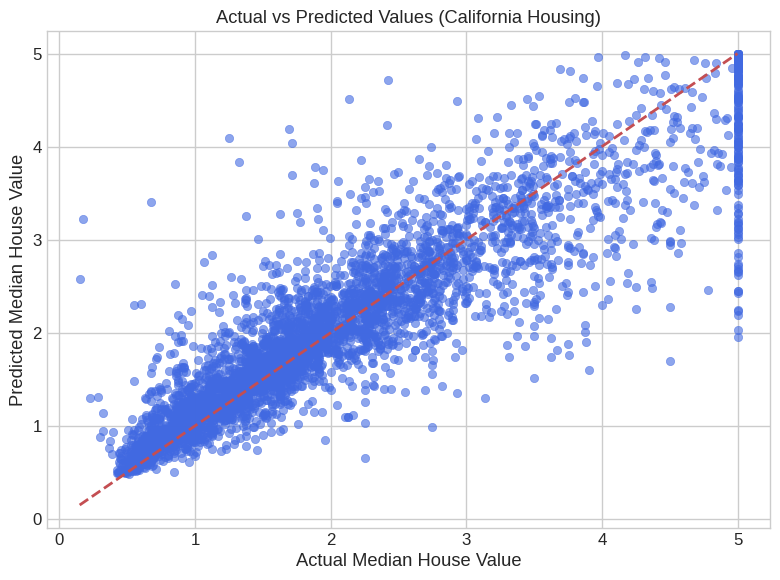

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8-whitegrid')


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values (California Housing)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


results_df.to_csv("house_price_predictions.csv", index=False)

print("Predictions saved as 'house_price_predictions.csv'")


Predictions saved as 'house_price_predictions.csv'


In [ ]:
import joblib


joblib.dump(rf_model, 'house_price_model.pkl')

print("Model saved as 'house_price_model.pkl'")


Model saved as 'house_price_model.pkl'


In [ ]:

loaded_model = joblib.load('house_price_model.pkl')


new_predictions = loaded_model.predict(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)


grid_search.fit(X_train, y_train)


print("Best Parameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error


y_pred_best = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 0.504018445179664


/tmp/ipython-input-53-1147660442.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette=sns.color_palette("viridis", len(feat_df)))


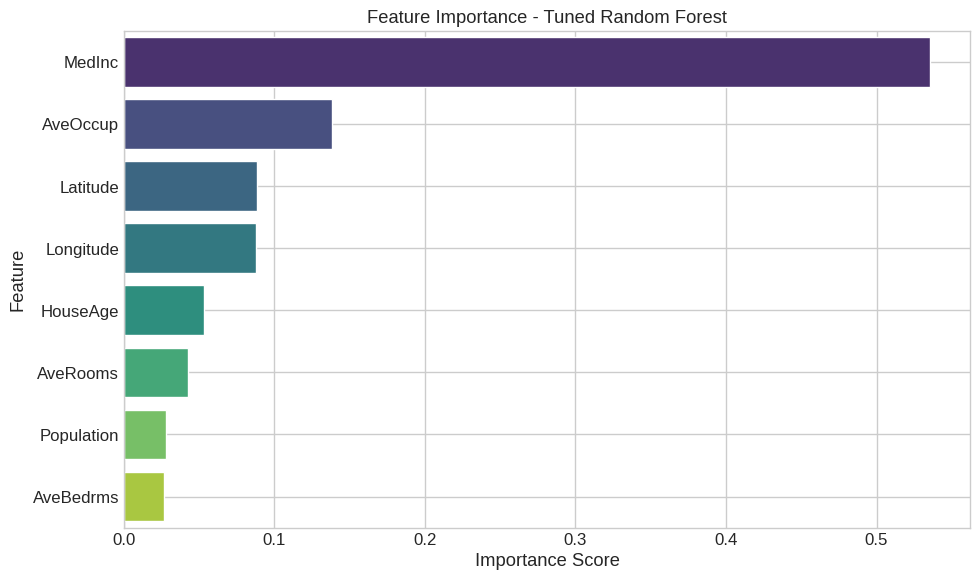

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


feature_importances = best_model.feature_importances_
features = X.columns


feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette=sns.color_palette("viridis", len(feat_df)))
plt.title("Feature Importance - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import joblib


joblib.dump(best_model, "house_price_rf_model.pkl")
print("Model saved as: house_price_rf_model.pkl")


Model saved as: house_price_rf_model.pkl


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


joblib.dump(rf_model, "house_price_rf_model.pkl")
print(" Model saved as 'house_price_rf_model.pkl'")


y_pred = rf_model.predict(X_test)
print("\nEvaluation:")
import numpy as np
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


loaded_model = joblib.load("house_price_rf_model.pkl")
print("\n Model loaded successfully")


loaded_predictions = loaded_model.predict(X_test)


print("\nFirst 10 predictions:", loaded_predictions[:10])


 Model saved as 'house_price_rf_model.pkl'

Evaluation:
MAE: 0.32754256845930246
RMSE: 0.5053399773665033
R2 Score: 0.8051230593157366

 Model loaded successfully

First 10 predictions: [0.5095    0.74161   4.9232571 2.52961   2.27369   1.64692   2.37605
 1.66932   2.7729706 4.9134589]


In [ ]:
import numpy as np
import joblib


model = joblib.load("house_price_rf_model.pkl")


sample_input = np.array([[8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]])


sample_prediction = model.predict(sample_input)


print("Predicted House Price:", sample_prediction[0])


Predicted House Price: 4.265793


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(model, "house_price_rf_model.pkl")
print("Model saved.")


Model saved.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame


X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


joblib.dump(model, "house_price_rf_model.pkl")
print("Model trained and saved as 'house_price_rf_model.pkl'")


Model trained and saved as 'house_price_rf_model.pkl'


In [ ]:
import pandas as pd


sample_data = pd.DataFrame({
    'MedInc': [8.3252, 5.6431, 3.8462],
    'HouseAge': [41, 30, 25],
    'AveRooms': [6.9841, 5.4651, 4.2345],
    'AveBedrms': [1.0238, 1.0570, 0.9842],
    'Population': [322, 450, 1250],
    'AveOccup': [2.5556, 3.0125, 2.8124],
    'Latitude': [37.88, 36.77, 35.64],
    'Longitude': [-122.23, -121.95, -120.85]
})


sample_data.to_csv("new_california_data.csv", index=False)
print("[INFO] Sample 'new_california_data.csv' created.")


[INFO] Sample 'new_california_data.csv' created.


In [ ]:

import pandas as pd
import joblib
import os


model_path = "house_price_rf_model.pkl"
data_path = "new_california_data.csv"
output_path = "predicted_california_prices.csv"


if not os.path.exists(model_path):
    raise FileNotFoundError(f"[ERROR] Model file '{model_path}' not found. Please train and save the model first.")


model = joblib.load(model_path)
print(f"[INFO] Model loaded successfully from: {model_path}")


if not os.path.exists(data_path):
    raise FileNotFoundError(f"[ERROR] Data file '{data_path}' not found. Please ensure it exists in your working directory.")


new_data = pd.read_csv(data_path)
print(f"[INFO] New data loaded successfully from: {data_path}")


predictions = model.predict(new_data)
new_data['Predicted_Median_House_Value'] = predictions


new_data.to_csv(output_path, index=False)
print(f"[INFO] Predictions saved to: {output_path}")


new_data.head()


[INFO] Model loaded successfully from: house_price_rf_model.pkl
[INFO] New data loaded successfully from: new_california_data.csv
[INFO] Predictions saved to: predicted_california_prices.csv


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Predicted_Median_House_Value
0,8.3252,41,6.9841,1.0238,322,2.5556,37.88,-122.23,4.265793
1,5.6431,30,5.4651,1.0570,450,3.0125,36.77,-121.95,2.860510
2,3.8462,25,4.2345,0.9842,1250,2.8124,35.64,-120.85,2.044100
